<a href="https://colab.research.google.com/github/Sarinda251/CAP_5415/blob/main/HW3_P1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [7]:
# load dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [8]:
# scale pixels
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
trainX = train_norm / 255.0
testX = test_norm / 255.0
# return normalized images

In [9]:
# create model
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# fit model
history = model2.fit(trainX, trainY, epochs=30, batch_size=64, validation_data=(testX, testY))
# evaluate model
_, acc = model2.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

Epoch 1/30
782/782 [==============================] - 175s 224ms/step - loss: 1.8221 - accuracy: 0.3497 - val_loss: 1.5483 - val_accuracy: 0.4512
Epoch 2/30
782/782 [==============================] - 178s 227ms/step - loss: 1.4846 - accuracy: 0.4755 - val_loss: 1.3921 - val_accuracy: 0.4960
Epoch 3/30
782/782 [==============================] - 181s 232ms/step - loss: 1.3332 - accuracy: 0.5287 - val_loss: 1.2866 - val_accuracy: 0.5387
Epoch 4/30
782/782 [==============================] - 176s 225ms/step - loss: 1.2043 - accuracy: 0.5752 - val_loss: 1.2055 - val_accuracy: 0.5766
Epoch 5/30
782/782 [==============================] - 176s 226ms/step - loss: 1.1026 - accuracy: 0.6137 - val_loss: 1.1000 - val_accuracy: 0.6134
Epoch 6/30
782/782 [==============================] - 178s 228ms/step - loss: 1.0215 - accuracy: 0.6419 - val_loss: 1.0616 - val_accuracy: 0.6247
Epoch 7/30
782/782 [==============================] - 175s 224ms/step - loss: 0.9625 - accuracy: 0.6644 - val_loss: 1.0251 -

In [14]:
print('accuracy: %.3f' % (acc * 100.0))

accuracy: 68.840


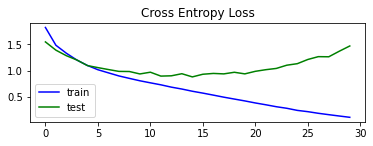

In [11]:
# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='green', label='test')
plt.legend()
plt.show()

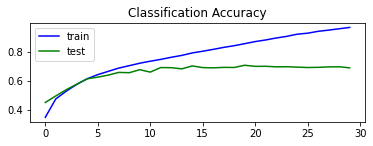

In [12]:
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='green', label='test')
plt.legend()
plt.show()